In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wine_data = pd.read_csv('/content/winequality-red (1).csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_data.shape

(1599, 12)

In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

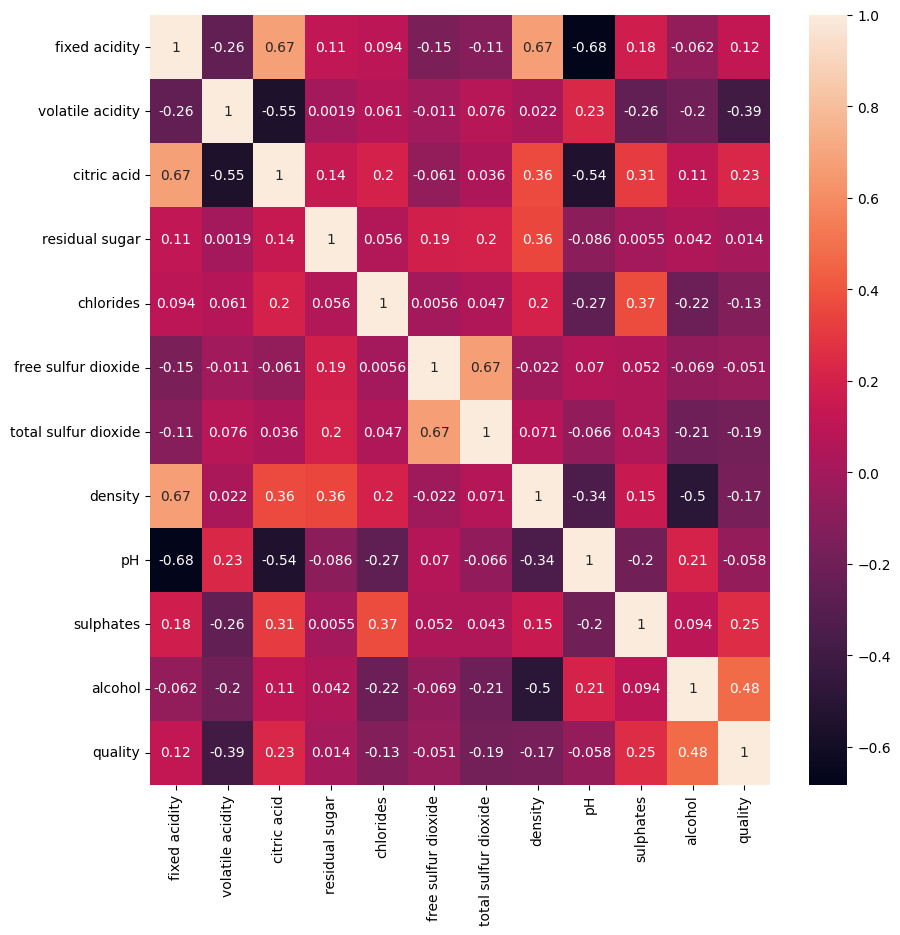

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_data.corr(), annot=True)
plt.show()

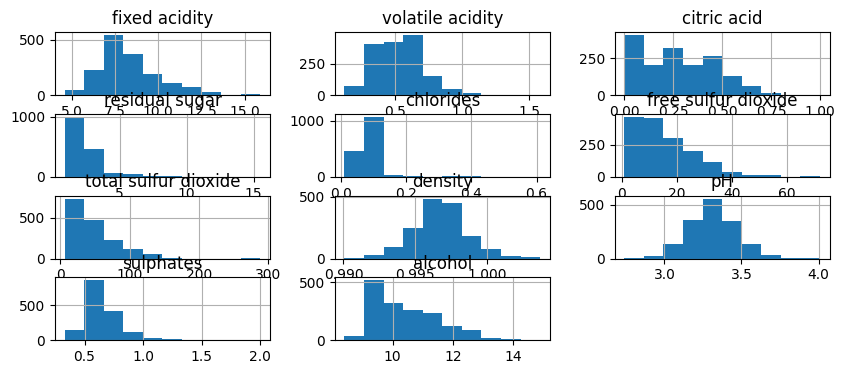

In [ ]:
freqgraph = wine_data.select_dtypes(include='float64')
freqgraph.hist(figsize=(10,4));

<Axes: xlabel='quality', ylabel='alcohol'>

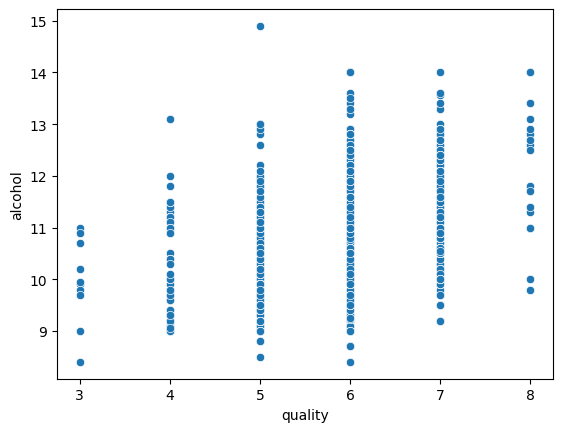

In [ ]:
sns.scatterplot(x="quality",y="alcohol",data=df)

<Axes: xlabel='alcohol', ylabel='Count'>

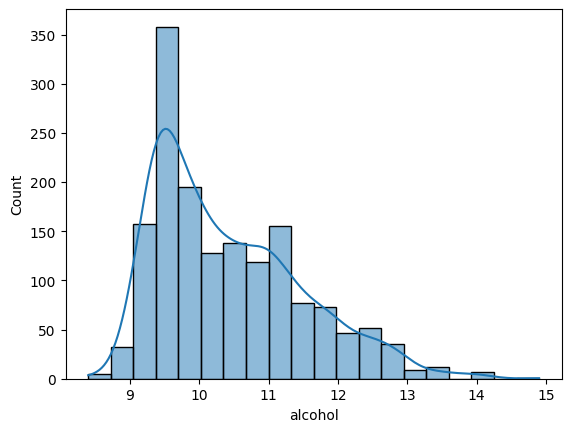

In [ ]:
sns.histplot(wine_data['alcohol'],bins=20,kde=True)

<Axes: xlabel='quality', ylabel='Count'>

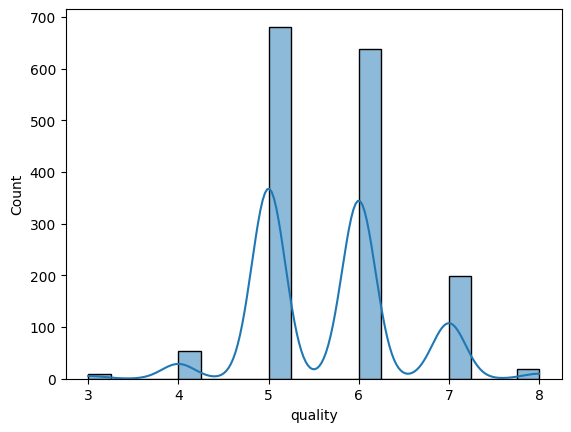

In [ ]:
sns.histplot(wine_data['quality'],bins=20,kde=True)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)

In [ ]:
label_quality = LabelEncoder()

In [ ]:
wine_data['quality'] = label_quality.fit_transform(wine_data['quality'])


In [ ]:
wine_data['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [ ]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

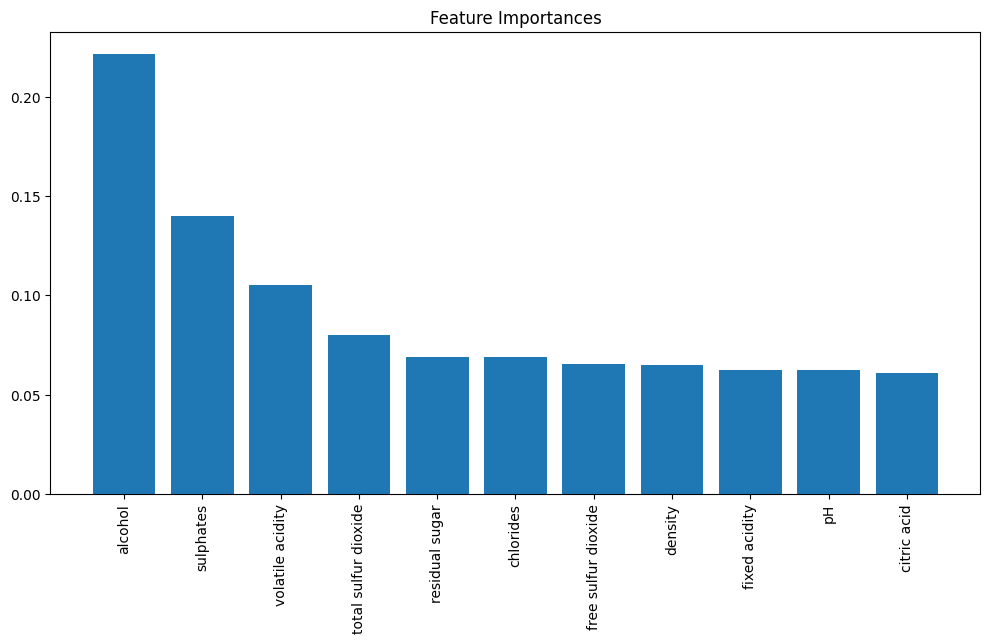

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X.columns[indices], rotation='vertical')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.07250875000000001
R-squared: 0.42133146286337775


In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(X_train)
new_Xtrain = norm_fit.transform(X_train)
new_xtest = norm_fit.transform(X_test)
print(new_Xtrain)

[[0.36283186 0.39041096 0.31       ... 0.58267717 0.22699387 0.49230769]
 [0.13274336 0.06164384 0.4        ... 0.4015748  0.13496933 0.53846154]
 [0.55752212 0.18493151 0.47       ... 0.44094488 0.23312883 0.21538462]
 ...
 [0.2300885  0.34246575 0.06       ... 0.60629921 0.10429448 0.16923077]
 [0.2920354  0.05479452 0.35       ... 0.45669291 0.26380368 0.53846154]
 [0.10619469 0.11643836 0.26       ... 0.51181102 0.10429448 0.78461538]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
rnd = RandomForestClassifier()
fit_rnd = rnd.fit(new_Xtrain,y_train)
rnd_score = rnd.score(new_xtest,y_test)
print('score of model is : ',rnd_score)
print('calculating the error')


score of model is :  0.90625
calculating the error


In [ ]:
x_predict = list(rnd.predict(X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
pd.DataFrame(predicted_df).head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,predicted_values,original_values
803,0,0
124,0,0
350,0,0
682,0,0
1326,0,0
976,0,0
1493,0,0
706,0,0
613,0,0
1587,0,0


In [ ]:
rnd_MSE = mean_squared_error(y_test,y_pred)
rnd_RMSE = np.sqrt(mse)
print('mean squared error is : ',rnd_MSE)
print('root mean squared error is : ',rnd_RMSE)
print(classification_report(x_predict,y_test))

mean squared error is :  0.07250875000000001
root mean squared error is :  0.2692744882085936
              precision    recall  f1-score   support

           0       0.96      0.86      0.90       305
           1       0.06      0.20      0.10        15

    accuracy                           0.82       320
   macro avg       0.51      0.53      0.50       320
weighted avg       0.91      0.82      0.87       320



In [ ]:
import pickle
file = 'wine_quality'
#save file
save = pickle.dump(rnd,open(file,'wb'))